<a href="https://colab.research.google.com/github/Somesh99/Machine-Learning/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       
       Group Members: 
       TANISHA YADAV  - DS7A-2116  Data Science
       SOMESH JOSHI   - DA7B-2117  Big Data Analytics

       Data Mining and Warehouse Assignment

# **Sentiment Analysis of Airline Review Tweets**

These are reviews of Airlines on twitter in the form of tweets. The dataset has been collected from Kaggle.

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading dataset

In [ ]:
df = pd.read_csv('Tweets.csv')
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Exploratory Data Analysis

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

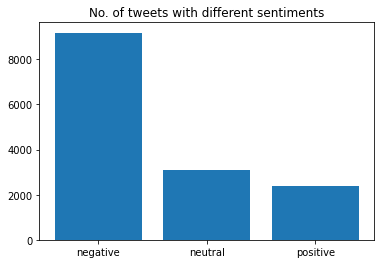

In [ ]:
plt.bar(df['airline_sentiment'].value_counts().index,df['airline_sentiment'].value_counts().values)
plt.title('No. of tweets with different sentiments')
plt.show()

Most of the tweets are from unsatisfied travellers.

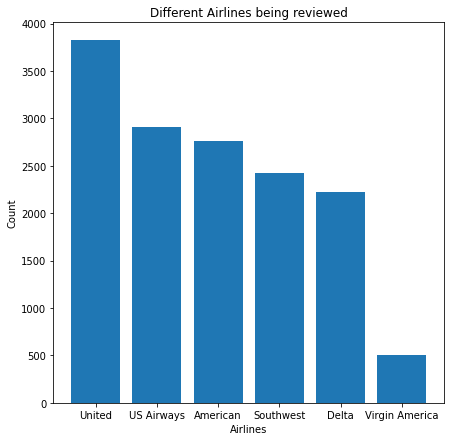

In [ ]:
plt.figure(figsize = (7,7))
plt.bar(df['airline'].value_counts().index,df['airline'].value_counts().values)
plt.title('Different Airlines being reviewed')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()


The reviews are for 6 airlines.

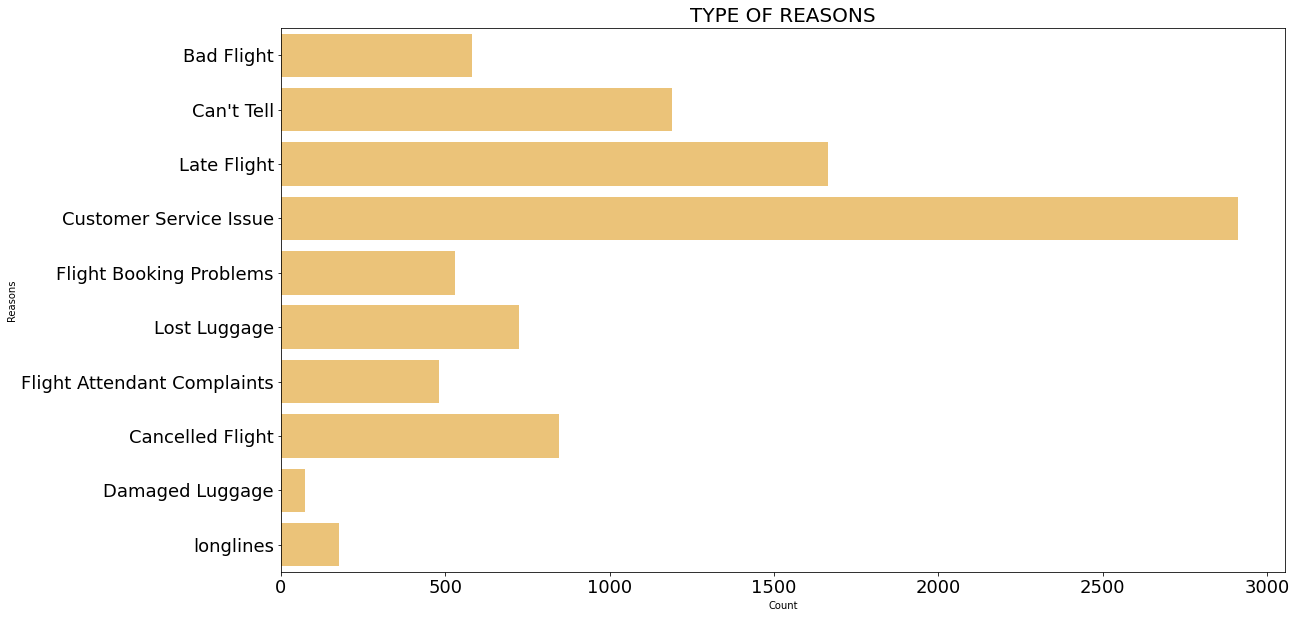

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.countplot(data=df, y='negativereason',alpha=.6,color='orange')
plt.title('TYPE OF REASONS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Reasons')
plt.xlabel('Count')
plt.savefig("TYPE OF REASONS")

Majority of the negative reviews are because of poor Customer service.

In [ ]:
da=df['tweet_location'].value_counts().head(6).index
da
db=df['tweet_location'].value_counts().head(6).values
db

array([157, 156, 150, 127, 126, 104])

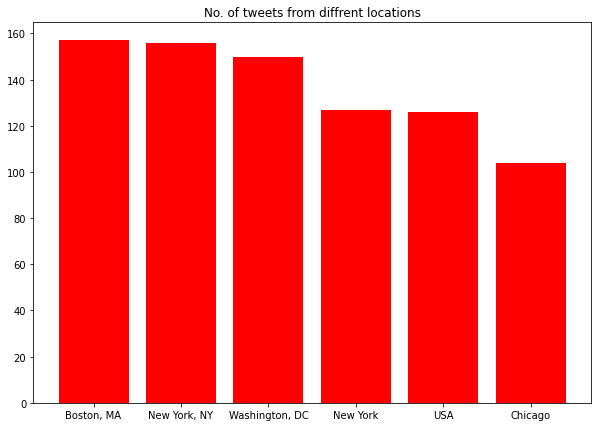

In [ ]:
plt.figure(figsize = (10,7))
plt.bar(da,db,color='red')
plt.title('No. of tweets from diffrent locations')
plt.show()

In [ ]:
df['date'] = df['tweet_created'].apply(lambda x: x.split(' ')[0])
df['time'] = df['tweet_created'].apply(lambda x: x.split(' ')[1])
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,570306133677760513,2,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24,11:35:52
1,570301130888122368,1,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24,11:15:59
2,570301083672813571,2,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24,11:15:48


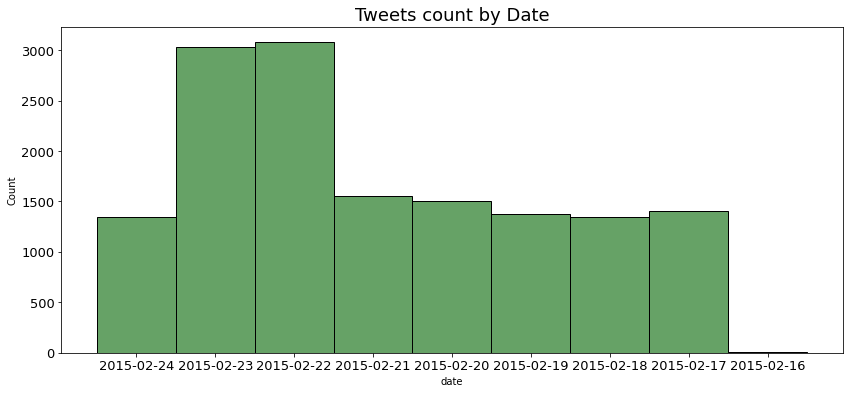

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='date',alpha=.6, color='darkgreen',bins=10)
plt.title('Tweets count by Date',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [ ]:
NR_Count=df['negativereason'].value_counts()
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame





In [ ]:
def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count,alpha = 0.5, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    

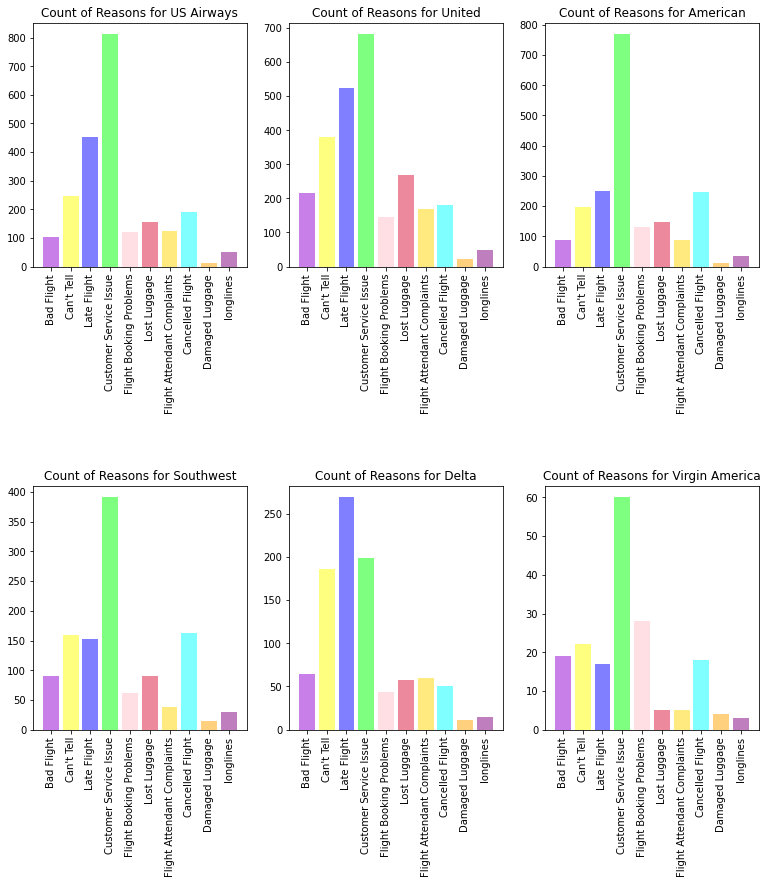

In [ ]:
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

## Dependent and Independent Variables

In [ ]:
X = df['text']
y = df['airline_sentiment']
X.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [ ]:
y.head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [ ]:
y.replace({'neutral' : 2,
           'positive' : 1,
           'negative' : 0}, inplace = True)
y.head()

0    2
1    1
2    2
3    0
4    0
Name: airline_sentiment, dtype: int64

# Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Stemming

In [ ]:
stemmer = PorterStemmer()

### Function for Data Processing
  * Removing tags
  * Removing non-alphabetic characters
  * Lower casing the reviews
  * Removing stopwords
  * Stemming

In [ ]:


def process_data(sentences):
  corpus = []
  tags = r"@\w*"
  sentences = [re.sub(tags, "", sentences)]             # removing tags
  for i in range(len(sentences)):
      review = re.sub('[^a-zA-Z]', ' ', sentences[i])  # replacing all non-alphabetic chars with space and return a string
      review = review.lower()                          # converting into lower case
      review = review.split()                          # converting string into list
      review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]    # stopwords removal and stemming
      review = ' '.join(review)
      corpus.append(review)
  return corpus

In [ ]:
process_data(X[2])

['today must mean need take anoth trip']

In [ ]:
X = X.apply(process_data)
X.head()

0                                               [said]
1                       [plu ad commerci experi tacki]
2               [today must mean need take anoth trip]
3    [realli aggress blast obnoxi entertain guest f...
4                               [realli big bad thing]
Name: text, dtype: object

### Converting list to String

In [ ]:
X = X.apply(lambda x: " ".join(x))
X.head()

0                                                 said
1                         plu ad commerci experi tacki
2                 today must mean need take anoth trip
3    realli aggress blast obnoxi entertain guest fa...
4                                 realli big bad thing
Name: text, dtype: object

# Splitting the dataset for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)
X_train.shape, X_test.shape

((11712,), (2928,))

# Method -1 : TF-IDF 
For converting text to numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X1_train = vectorizer.fit_transform(X_train).toarray()
X1_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X1_test = vectorizer.transform(X_test).toarray()
X1_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Method -2 : Bag Of Words
For converting text to numbers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer = CountVectorizer()
X2_train = c_vectorizer.fit_transform(X_train).toarray()
X2_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X2_test = c_vectorizer.transform(X_test).toarray()
X2_test[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model Building

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model1=LogisticRegression()
model1.fit(X1_train,y_train)
ans1=model1.predict(X1_test)

confusion_matrix(ans1,y_test)
accuracy_score(ans1,y_test)
print(classification_report(ans1, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.94      0.82      0.87      2109
           1       0.62      0.81      0.70       360
           2       0.48      0.66      0.56       459

    accuracy                           0.79      2928
   macro avg       0.68      0.76      0.71      2928
weighted avg       0.83      0.79      0.80      2928



In [ ]:
model2=LogisticRegression(max_iter=200)
model2.fit(X2_train,y_train)
ans2=model2.predict(X2_test)
confusion_matrix(ans2,y_test)
accuracy_score(ans2,y_test)
print(classification_report(ans2, y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1923
           1       0.69      0.75      0.72       435
           2       0.57      0.62      0.59       570

    accuracy                           0.79      2928
   macro avg       0.72      0.74      0.73      2928
weighted avg       0.80      0.79      0.79      2928



In [ ]:
?LogisticRegression

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelnbc1 = MultinomialNB()
modelnbc1.fit(X1_train, y_train)
prednbc1 = modelnbc1.predict(X1_test)
print(confusion_matrix(prednbc1, y_test))
accuracy_score(prednbc1,y_test)
print(classification_report(prednbc1, y_test))

[[1818  357  504]
 [   0   94   11]
 [  14   22  108]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      2679
           1       0.20      0.90      0.33       105
           2       0.17      0.75      0.28       144

    accuracy                           0.69      2928
   macro avg       0.45      0.77      0.47      2928
weighted avg       0.92      0.69      0.76      2928



In [ ]:
modelnbc2 = MultinomialNB()
modelnbc2.fit(X2_train, y_train)
prednbc2 = modelnbc2.predict(X2_test)
print(confusion_matrix(prednbc2, y_test))
print(classification_report(prednbc2, y_test))


[[1745  163  340]
 [  22  258   37]
 [  65   52  246]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2248
           1       0.55      0.81      0.65       317
           2       0.39      0.68      0.50       363

    accuracy                           0.77      2928
   macro avg       0.63      0.76      0.67      2928
weighted avg       0.84      0.77      0.79      2928



### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Classifier1= KNeighborsClassifier(n_neighbors=51, p=2)
Classifier1.fit(X1_train,y_train)
y_pred1=Classifier1.predict(X1_test)
print(confusion_matrix(y_pred1, y_test))
print(classification_report(y_pred1, y_test))

[[1685  204  340]
 [  10  180   28]
 [ 137   89  255]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2229
           1       0.38      0.83      0.52       218
           2       0.41      0.53      0.46       481

    accuracy                           0.72      2928
   macro avg       0.57      0.70      0.60      2928
weighted avg       0.80      0.72      0.75      2928



In [ ]:

Classifier2= KNeighborsClassifier(n_neighbors=51, p=2)
Classifier2.fit(X2_train,y_train)
y_pred2=Classifier2.predict(X2_test)
print(confusion_matrix(y_pred2, y_test))
print(classification_report(y_pred2, y_test))

[[ 679   24   41]
 [ 110  250   53]
 [1043  199  529]]
              precision    recall  f1-score   support

           0       0.37      0.91      0.53       744
           1       0.53      0.61      0.56       413
           2       0.85      0.30      0.44      1771

    accuracy                           0.50      2928
   macro avg       0.58      0.61      0.51      2928
weighted avg       0.68      0.50      0.48      2928



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
clf1 = DecisionTreeClassifier()
clf1.fit(X1_train,y_train)
y1_pred = clf1.predict(X1_test)
print(accuracy_score(y_test,y1_pred))
print(confusion_matrix(y1_pred, y_test))
print(classification_report(y1_pred, y_test))

0.6912568306010929
[[1435  134  228]
 [ 115  260   66]
 [ 282   79  329]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1797
           1       0.55      0.59      0.57       441
           2       0.53      0.48      0.50       690

    accuracy                           0.69      2928
   macro avg       0.62      0.62      0.62      2928
weighted avg       0.69      0.69      0.69      2928



In [ ]:
clf2 = DecisionTreeClassifier()
clf2.fit(X2_train,y_train)
y2_pred = clf2.predict(X2_test)
print(accuracy_score(y_test,y2_pred))
print(confusion_matrix(y2_pred, y_test))
print(classification_report(y2_pred, y_test))

0.6871584699453552
[[1434  120  224]
 [ 113  257   78]
 [ 285   96  321]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1778
           1       0.54      0.57      0.56       448
           2       0.52      0.46      0.48       702

    accuracy                           0.69      2928
   macro avg       0.61      0.61      0.61      2928
weighted avg       0.68      0.69      0.68      2928



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
clf_1=RandomForestClassifier(n_estimators=500)
clf_1.fit(X1_train,y_train)
y1_pred=clf_1.predict(X1_test)
print(confusion_matrix(y1_pred, y_test))
print(classification_report(y1_pred, y_test))

[[1678  153  285]
 [  36  260   44]
 [ 118   60  294]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2116
           1       0.55      0.76      0.64       340
           2       0.47      0.62      0.54       472

    accuracy                           0.76      2928
   macro avg       0.65      0.73      0.68      2928
weighted avg       0.80      0.76      0.78      2928



In [ ]:
clf_2=RandomForestClassifier(n_estimators=500)
clf_2.fit(X2_train,y_train)
y_pred2=clf_2.predict(X2_test)
print(confusion_matrix(y_pred2, y_test))
print(classification_report(y_pred2, y_test))

[[1642  125  248]
 [  48  269   47]
 [ 142   79  328]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2015
           1       0.57      0.74      0.64       364
           2       0.53      0.60      0.56       549

    accuracy                           0.76      2928
   macro avg       0.66      0.72      0.69      2928
weighted avg       0.79      0.76      0.77      2928



## Conclusion

The maximum accuracy achieved so far is **79%** by Logistic Regression - Bag of Words.

In [ ]:
t = ('s','j')
[ (i,j) for i,j in enumerate(t)]

[(0, 's'), (1, 'j')]

In [ ]:
import numpy as np

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
df = pandas